# Validation

In this example, we demonstrate how to validate input data for a project.

First, let's import the necessary packages:

In [40]:
from probabilistic_library import ReliabilityProject, SensitivityProject, UncertaintyProject 
from probabilistic_library import DistributionType, ReliabilityMethod, SensitivityMethod, UncertaintyMethod
from utils.models import bligh
import matplotlib.pyplot as plt

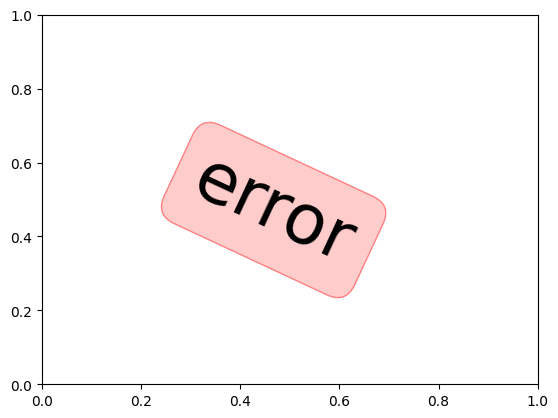

In [41]:
plt.text(0.65, 0.65, "error", size=50, rotation=-25.,
         ha="right", va="top",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

plt.show()

Now, let's prepare some projects with both valid and invalid input data:

In [42]:
def valid_reliability_analysis():

    project = ReliabilityProject()
    project.model = bligh

    project.variables["m"].distribution = DistributionType.log_normal
    project.variables["m"].mean = 1.76
    project.variables['m'].scale = 0.1

    project.variables["L"].distribution = DistributionType.normal
    project.variables["L"].mean = 50
    project.variables["L"].deviation = 2.5

    project.variables["c_creep"].distribution = DistributionType.deterministic
    project.variables["c_creep"].mean = 18

    project.variables["delta_H"].distribution = DistributionType.gumbel
    project.variables["delta_H"].shift = 0.53
    project.variables["delta_H"].scale = 0.406

    project.settings.reliability_method = ReliabilityMethod.form
    project.settings.relaxation_factor = 0.75
    project.settings.maximum_iterations = 50
    project.settings.epsilon_beta = 0.01

    return project

In [43]:
def invalid_reliability_analysis():

    project = ReliabilityProject()
    project.model = bligh

    project.variables["m"].distribution = DistributionType.log_normal
    project.variables["m"].mean = 1.76
    project.variables['m'].scale = -0.1 # wrong: scale must be positive

    project.variables["L"].distribution = DistributionType.normal
    project.variables["L"].mean = 50
    project.variables["L"].deviation = 2.5

    project.variables["c_creep"].distribution = DistributionType.uniform
    project.variables["c_creep"].minimum = 18
    project.variables["c_creep"].maximum = 17

    project.variables["delta_H"].distribution = DistributionType.triangular
    project.variables["delta_H"].minimum = 0.0
    project.variables["delta_H"].maximum = -1.0 # wrong: maximum must be greater than minimum
    project.variables["delta_H"].shift = 2.0

    project.settings.reliability_method = ReliabilityMethod.crude_monte_carlo
    project.settings.minimum_samples = 1000
    project.settings.maximum_samples = 500 # wrong: maximum_samples must be greater than minimum_samples

    return project

In [44]:
def invalid_sensitivity_analysis():

    project = SensitivityProject()
    project.model = bligh

    project.variables["m"].distribution = DistributionType.log_normal
    project.variables["m"].mean = 1.76
    project.variables['m'].scale = -0.1 # wrong: scale must be positive

    project.variables["L"].distribution = DistributionType.normal
    project.variables["L"].mean = 50
    project.variables["L"].deviation = 2.5

    project.variables["c_creep"].distribution = DistributionType.uniform
    project.variables["c_creep"].minimum = 18
    project.variables["c_creep"].maximum = 17 # wrong: maximum must be greater than minimum

    project.variables["delta_H"].distribution = DistributionType.triangular
    project.variables["delta_H"].minimum = 0.0 
    project.variables["delta_H"].maximum = -1.0 # wrong: maximum must be greater than minimum
    project.variables["delta_H"].shift = 2.0 

    project.settings.sensitivity_method = SensitivityMethod.single_variation
    project.settings.low_value = -0.99 # wrong: value must be between 0 and 1
    project.settings.high_value = 2.99 # wrong: value must be between 0 and 1

    return project

In [45]:
def invalid_uncertainty_analysis():

    project = UncertaintyProject()
    project.model = bligh

    project.variables["m"].distribution = DistributionType.log_normal
    project.variables["m"].mean = 1.76
    project.variables['m'].scale = -0.1 # wrong: scale must be positive

    project.variables["L"].distribution = DistributionType.normal
    project.variables["L"].mean = 50
    project.variables["L"].deviation = 2.5

    project.variables["c_creep"].distribution = DistributionType.uniform
    project.variables["c_creep"].minimum = 18
    project.variables["c_creep"].maximum = 17 # wrong: maximum must be greater than minimum

    project.variables["delta_H"].distribution = DistributionType.triangular
    project.variables["delta_H"].minimum = 0.0 
    project.variables["delta_H"].maximum = -1.0 # wrong: maximum must be greater than minimum
    project.variables["delta_H"].shift = 2.0 

    project.settings.uncertainty_method = UncertaintyMethod.crude_monte_carlo
    project.settings.minimum_samples = -99 # wrong: minimum_samples must be positive (it is not used in Uncertainty analysis)
    project.settings.maximum_samples = -99 # wrong: maximum_samples must be positive

    return project

It is possible to validate projects, variables, and settings. Only the properties that are in use will be validated.

There are two ways to perform validation: `is_valid()` and `validate()`.

* `is_valid()` returns True or False <br>
* `validate()` provides any error messages that occur.

### Project validation

In [46]:
project_valid = valid_reliability_analysis()

print(project_valid.is_valid())
project_valid.validate()

True
ok


In [47]:
project_invalid = invalid_reliability_analysis()

print(project_invalid.is_valid())
project_invalid.validate()

False
Error: m => scale value -0.1 is less than 0.
Error: c_creep => maximum value 17 is less than 18.
Error: delta_H => shift value 2 is greater than -1.
Error: maximum samples value 500 is less than 1000.


### Variable validation

In [48]:
project_invalid = invalid_sensitivity_analysis()

print(project_invalid.variables["m"].is_valid())
project_invalid.variables["m"].validate()

False
Error: m => scale value -0.1 is less than 0.


### Settings validation

In [49]:
project_invalid = invalid_uncertainty_analysis()

print(project_invalid.settings.is_valid())
project_invalid.settings.validate()

False
Error: minimum samples value -99 is less than 1.
